In [30]:
#to hsv

In [31]:
from skimage import io, color, data
import cv2
import numpy as np

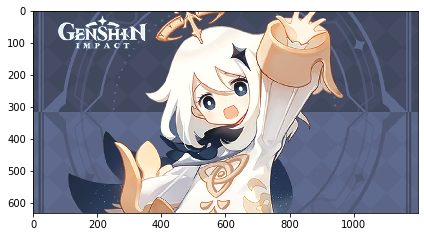

In [65]:
img = io.imread('paimon.jpg')
io.imshow(img)

In [33]:
img.shape

(630, 1200, 3)

In [34]:
def func_to_hsv(img):
    new_img = np.zeros(img.shape, img.dtype)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
                r = img[x,y,0]/255
                g = img[x,y,1]/255
                b = img[x,y,2]/255
                maxx = max(r,g,b)
                minn = min(r,g,b)
                delta = maxx - minn

                if delta == 0:
                    h = 0
                elif maxx == r:
                    h = (60 * ((g-b)/delta) + 360) % 360
                elif maxx == g:
                    h = (60 * ((b-r)/delta) + 120) % 360
                elif maxx == b:
                    h = (60 * ((r-g)/delta) + 240) % 360
                v = maxx
                if maxx == 0:
                    s = 0
                else:
                    s = delta/maxx

                new_img[x,y] = [(h/2), (s*255), (v*255)]

    return new_img

In [35]:
n_ = func_to_hsv(img)

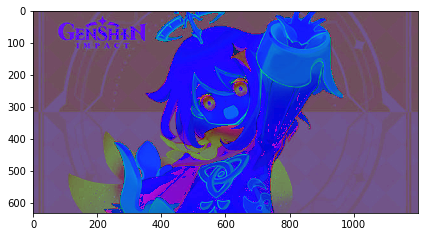

In [36]:
io.imshow(n_)

In [64]:
# brightness grid
import matplotlib.pyplot as plt

In [24]:
def image_(img, br, ctr):
    new_image = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_image[y,x,c]= np.clip(ctr *img[y,x,c]+br,0,255)
    return new_image

In [10]:
#am inlocuit -10 cu 0.1
#si -5 cu 0.5
#valorile pe care le primeste contrastul pot fi intre (0;1) - contrastul scade
#si intre (1;10)- constrastul creste
#pentru valoarea 1 contrastul nu se schimba

In [66]:
def contrastbright(img, contrast, brightness):
    img2 = cv2.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness)
    return img2

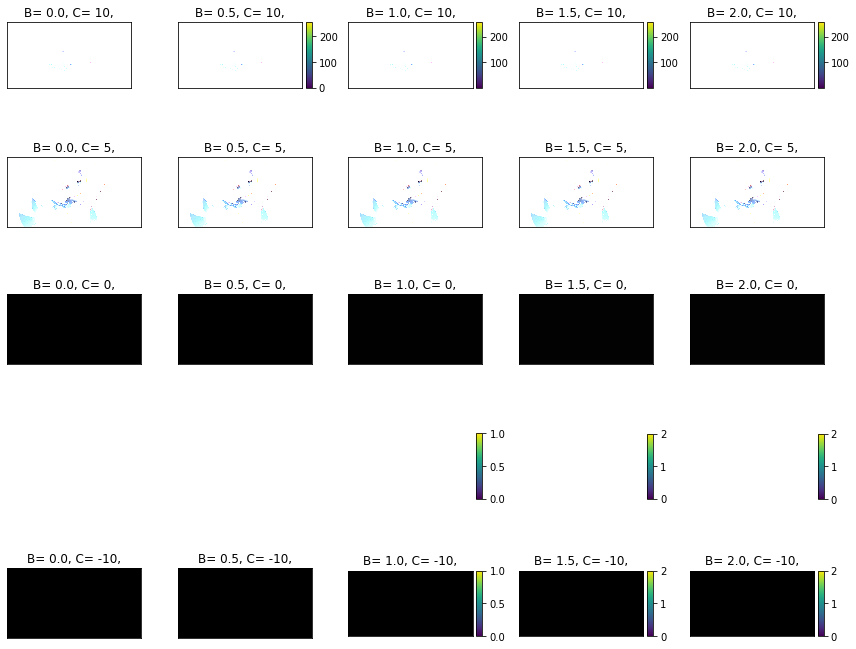

In [73]:
x=5
y=5

k = 1  # initialize plot counter
ctr= 15
fig = plt.figure(figsize=(12,10))

for i in range(1,6):
    ctr-=5
    br= -0.5
    for j in range(1,6):
        plt.subplot(x,y,k)
        br += 0.5
        plt.title('B= {}, C= {},'.format(br, ctr))
        plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
        k+=1
        io.imshow(contrastbright(img,ctr,br))

In [37]:
#blur
from skimage.metrics import structural_similarity as ssim

In [56]:
img_grey =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median_img = cv2.medianBlur(img_grey,5)
bilateral_img = cv2.bilateralFilter(img_grey, 2,100,50)
gaus_img = cv2.GaussianBlur(img_grey, (5,5), cv2.BORDER_DEFAULT)

In [57]:
ssim_orig = ssim(img_grey, img_grey, data_range=img_grey.max() - img_grey.min(), multichannel  =True)
ssim_median = ssim(img_grey, median_img, data_range=img_grey.max() - img_grey.min(), multichannel  =True)
ssim_bilateral = ssim(img_grey, bilateral_img, data_range=img_grey.max() - img_grey.min(), multichannel  =True)
ssim_gaus = ssim(img_grey, gaus_img, data_range=img_grey.max() - img_grey.min(), multichannel  =True)

Text(0.5, 1.0, '0.9326985652364351')

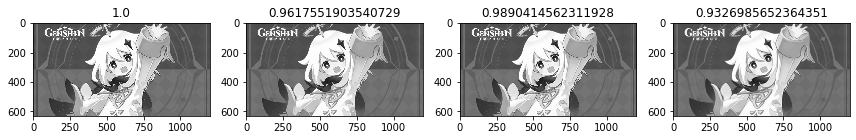

In [60]:
fig = plt.figure(figsize=(12,20))
orig = plt.subplot(1,4,1)
io.imshow(img_grey)
orig.set_title(ssim_orig)

median = plt.subplot(1,4,2)
io.imshow(median_img)
median.set_title(ssim_median)

bilateral = plt.subplot(1,4,3)
io.imshow(bilateral_img)
bilateral.set_title(ssim_bilateral)

gaus = plt.subplot(1,4,4)
io.imshow(gaus_img)
gaus.set_title(ssim_gaus)